# Week 4 Worksheet: Personal Income Analysis - SOLUTIONS
## Nested Loops, Lists of Lists, and Nested Functions

**Learning Objectives:**
- Work with CSV data as lists of lists
- Use nested loops to filter and process data
- Create nested functions for data visualization
- Compare income across age groups and gender

---
## Exercise 1: Reading CSV into a List of Lists - SOLUTION

In [1]:
import csv

# Read the CSV file into a list of lists
data = []

with open('personal_income.csv', 'r', encoding='utf-8-sig') as file:
    csv_reader = csv.reader(file)
    
    # Skip header row
    header = next(csv_reader)
    
    # Loop through rows and append to data list
    for row in csv_reader:
        data.append(row)

# Print first 5 rows to verify
print("First 5 rows:")
for i in range(5):
    print(data[i])

print(f"\nTotal rows loaded: {len(data)}")

First 5 rows:
['15-19 years', 'men', '2014', '28000']
['15-19 years', 'men', '2015', '27900']
['15-19 years', 'men', '2016', '28400']
['15-19 years', 'men', '2017', '29600']
['15-19 years', 'men', '2018', '31300']

Total rows loaded: 280


---
## Exercise 2: Filtering Data with Nested Loops - SOLUTION

In [2]:
# Create empty lists for filtered data
years_men = []
income_men = []
years_women = []
income_women = []

# Target age group
target_age = "20-24 years"

# Loop through data and filter
for row in data:
    age = row[0]
    gender = row[1]
    year = row[2]
    income = row[3]
    
    # Check if age matches target_age
    if age == target_age:
        # Convert income to integer and divide by 1000
        income_thousands = int(income) / 1000
        
        # Check gender and append to appropriate lists
        if gender == "men":
            years_men.append(year)
            income_men.append(income_thousands)
        elif gender == "women":
            years_women.append(year)
            income_women.append(income_thousands)

# Print results
print(f"Age Group: {target_age}")
print(f"\nYears: {years_men}")
print(f"\nMen's income (thousands DKK): {income_men}")
print(f"\nWomen's income (thousands DKK): {income_women}")

# Calculate average pay gap
total_gap = 0
for i in range(len(income_men)):
    gap = (income_men[i] - income_women[i]) / income_men[i] * 100
    total_gap = total_gap + gap

avg_gap = total_gap / len(income_men)
print(f"\nAverage pay gap: {avg_gap:.1f}%")

Age Group: 20-24 years

Years: ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

Men's income (thousands DKK): [128.7, 131.8, 136.7, 140.0, 147.4, 149.9, 153.4, 168.2, 167.4, 170.7]

Women's income (thousands DKK): [100.2, 102.3, 104.5, 107.8, 112.4, 115.0, 119.3, 134.6, 130.6, 132.2]

Average pay gap: 22.5%


---
## Exercise 3: Creating a Data Filtering Function - SOLUTION

In [3]:
def filter_by_age(data, age_group):
    """
    Filter income data by age group.
    
    Args:
        data: List of lists containing income data
        age_group: String like "20-24 years"
        
    Returns:
        years_men, income_men, years_women, income_women (all lists)
    """
    # Initialize empty lists
    years_men = []
    income_men = []
    years_women = []
    income_women = []
    
    # Loop through data and filter
    for row in data:
        age = row[0]
        gender = row[1]
        year = row[2]
        income = int(row[3]) / 1000  # Convert to thousands
        
        # Filter by age group
        if age == age_group:
            if gender == "men":
                years_men.append(year)
                income_men.append(income)
            elif gender == "women":
                years_women.append(year)
                income_women.append(income)
    
    return years_men, income_men, years_women, income_women

# Test the function
test_ages = ["20-24 years", "35-39 years", "55-59 years"]

for age in test_ages:
    years_men, income_men, years_women, income_women = filter_by_age(data, age)
    print(f"{age}:")
    print(f"  Men: {income_men[-1]:.0f}k DKK")
    print(f"  Women: {income_women[-1]:.0f}k DKK")
    print()


20-24 years:
  Men: 171k DKK
  Women: 132k DKK

35-39 years:
  Men: 470k DKK
  Women: 347k DKK

55-59 years:
  Men: 528k DKK
  Women: 364k DKK



---
## Exercise 4: Nested Function for Plotting - SOLUTION

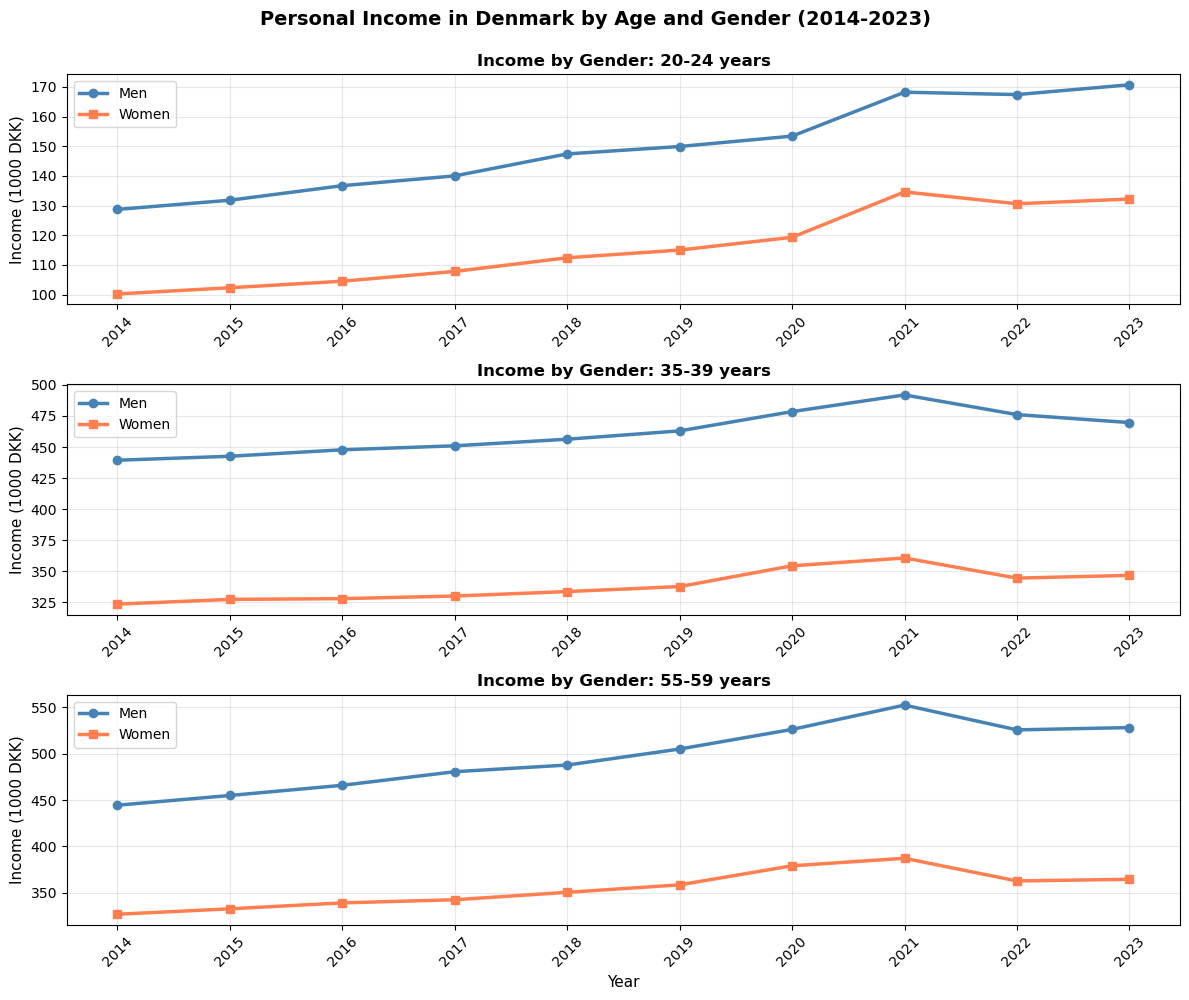

In [4]:
import matplotlib.pyplot as plt

def create_income_plots(data, age_groups):
    """
    Create income comparison plots for multiple age groups.
    
    Args:
        data: List of lists containing income data
        age_groups: List of age group strings to plot
    """
    
    # Nested function to plot a single age group
    def plot_age_group(age, subplot_position):
        """
        Plot income data for one age group.
        
        Args:
            age: Age group string (e.g., "20-24 years")
            subplot_position: Position in subplot grid (e.g., 311)
        """
        # Filter data for this age group
        years_men, income_men, years_women, income_women = filter_by_age(data, age)
        
        # Create subplot
        plt.subplot(subplot_position)
        
        # Plot men's income (line with markers)
        plt.plot(years_men, income_men, 'o-', 
                label='Men', color='steelblue', linewidth=2.5, markersize=6)
        
        # Plot women's income (line with markers)
        plt.plot(years_women, income_women, 's-', 
                label='Women', color='coral', linewidth=2.5, markersize=6)
        
        # Add labels and formatting
        plt.ylabel('Income (1000 DKK)', fontsize=11)
        plt.title(f'Income by Gender: {age}', fontsize=12, fontweight='bold')
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # Only add x-label to bottom plot
        if subplot_position == 313:
            plt.xlabel('Year', fontsize=11)
            
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
    
    # Create figure
    plt.figure(figsize=(12, 10))
    
    # Add main title
    plt.suptitle('Personal Income in Denmark by Age and Gender (2014-2023)', 
                fontsize=14, fontweight='bold', y=0.995)
    
    # Call nested function for each age group
    for i, age in enumerate(age_groups):
        position = 311 + i
        plot_age_group(age, position)
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

# Create the plots
age_groups_to_plot = ["20-24 years", "35-39 years", "55-59 years"]
create_income_plots(data, age_groups_to_plot)

---
## Bonus Exercise: Gender Pay Gap Analysis - SOLUTION

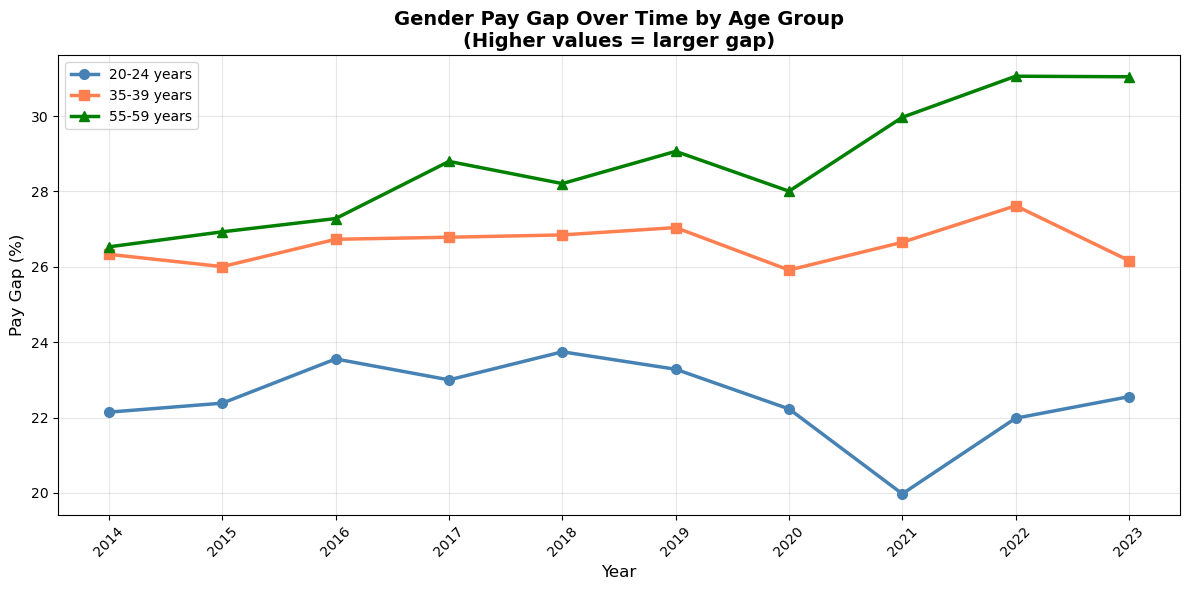


Gender Pay Gap Summary

20-24 years:
  2014: 22.1%
  2023: 22.6%
  Change: +0.4 percentage points
  Status: ✗ Gap increased (worsened)

35-39 years:
  2014: 26.3%
  2023: 26.2%
  Change: -0.2 percentage points
  Status: ✓ Gap decreased (improved)

55-59 years:
  2014: 26.5%
  2023: 31.0%
  Change: +4.5 percentage points
  Status: ✗ Gap increased (worsened)



In [5]:
def calculate_pay_gap(data, age_groups):
    """
    Calculate gender pay gap for multiple age groups.
    
    Returns:
        years: List of years
        gaps: Dictionary with age groups as keys and gap percentages as values
    """
    gaps = {}
    years = None
    
    # Calculate gap for each age group
    for age in age_groups:
        years_men, income_men, years_women, income_women = filter_by_age(data, age)
        
        if years is None:
            years = years_men
        
        # Calculate gap percentage for each year
        gap_percentages = []
        for i in range(len(income_men)):
            gap = (income_men[i] - income_women[i]) / income_men[i] * 100
            gap_percentages.append(gap)
        
        gaps[age] = gap_percentages
    
    return years, gaps

# Calculate gaps
age_groups = ["20-24 years", "35-39 years", "55-59 years"]
years, gaps = calculate_pay_gap(data, age_groups)

# Plot the pay gaps
plt.figure(figsize=(12, 6))

colors = ['steelblue', 'coral', 'green']
markers = ['o', 's', '^']

for i, age in enumerate(age_groups):
    plt.plot(years, gaps[age], f'{markers[i]}-', 
            label=age, color=colors[i], linewidth=2.5, markersize=7)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Pay Gap (%)', fontsize=12)
plt.title('Gender Pay Gap Over Time by Age Group\n(Higher values = larger gap)', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("Gender Pay Gap Summary")
print("="*60)

for age in age_groups:
    gap_2014 = gaps[age][0]
    gap_2023 = gaps[age][-1]
    change = gap_2023 - gap_2014
    
    print(f"\n{age}:")
    print(f"  2014: {gap_2014:.1f}%")
    print(f"  2023: {gap_2023:.1f}%")
    print(f"  Change: {change:+.1f} percentage points")
    
    if change < 0:
        print(f"  Status: ✓ Gap decreased (improved)")
    else:
        print(f"  Status: ✗ Gap increased (worsened)")

print("\n" + "="*60)

---
## Additional Analysis: Income Growth Over Time

In [6]:
def analyze_income_growth(data, age_groups):
    """
    Analyze income growth from 2014 to 2023 for different age groups.
    """
    print("\n" + "="*70)
    print("Income Growth Analysis (2014-2023)")
    print("="*70)
    
    for age in age_groups:
        y_m, i_m, y_w, i_w = filter_by_age(data, age)
        
        # Calculate growth
        men_growth = (i_m[-1] - i_m[0]) / i_m[0] * 100
        women_growth = (i_w[-1] - i_w[0]) / i_w[0] * 100
        
        print(f"\n{age}:")
        print(f"  Men:")
        print(f"    2014: {i_m[0]:.0f}k DKK")
        print(f"    2023: {i_m[-1]:.0f}k DKK")
        print(f"    Growth: {men_growth:.1f}%")
        
        print(f"  Women:")
        print(f"    2014: {i_w[0]:.0f}k DKK")
        print(f"    2023: {i_w[-1]:.0f}k DKK")
        print(f"    Growth: {women_growth:.1f}%")
        
        if women_growth > men_growth:
            print(f"  → Women's income grew faster (+{women_growth - men_growth:.1f}pp)")
        else:
            print(f"  → Men's income grew faster (+{men_growth - women_growth:.1f}pp)")
    
    print("\n" + "="*70)

# Run the analysis
analyze_income_growth(data, age_groups_to_plot)


Income Growth Analysis (2014-2023)

20-24 years:
  Men:
    2014: 129k DKK
    2023: 171k DKK
    Growth: 32.6%
  Women:
    2014: 100k DKK
    2023: 132k DKK
    Growth: 31.9%
  → Men's income grew faster (+0.7pp)

35-39 years:
  Men:
    2014: 439k DKK
    2023: 470k DKK
    Growth: 6.9%
  Women:
    2014: 324k DKK
    2023: 347k DKK
    Growth: 7.1%
  → Women's income grew faster (+0.2pp)

55-59 years:
  Men:
    2014: 444k DKK
    2023: 528k DKK
    Growth: 18.9%
  Women:
    2014: 326k DKK
    2023: 364k DKK
    Growth: 11.6%
  → Men's income grew faster (+7.3pp)



---
## Reflection Questions - ANSWERS

**1. Nested Loops:** 
- Nested loops were essential for filtering by both age AND gender
- The outer loop went through all rows, the inner logic checked multiple conditions
- Could use list comprehension as alternative, but nested loops are more explicit and readable for beginners

**2. Nested Functions:**
- The nested `plot_age_group()` function:
  - Has access to the outer function's variables (data, filter_by_age)
  - Keeps plotting logic organized and reusable
  - Makes the main function cleaner - just calls the nested function 3 times
  - Encapsulates the plotting logic that's only used in this specific context

**3. Data Insights:**
- **Highest earners:** 35-39 age group (peak earning years)
- **Pay gap trends:** Gap is larger in older age groups (35-39, 55-59 have ~26-31% gap)
- **Younger workers:** 20-24 age group has smallest gap (~22%)
- **Overall trend:** Pay gap has slightly decreased in some age groups, but still significant

**4. List of Lists vs Dictionary:**

*Advantages of list of lists:*
- Simple structure, easy to understand
- Direct from CSV reading
- Memory efficient
- Good for row-by-row processing

*Disadvantages:*
- Must remember index positions (age=0, gender=1, etc.)
- Less readable code (row[2] vs row['year'])
- No named access to fields

*When to use dictionary:*
- When you need named field access
- When column order might change
- For more complex data structures